# Dataset Preparation

In [1]:
import pandas as pd
import json

dataset=pd.DataFrame()
# removed Books, removed Clothing_Shoes_and_Jewelry due size constraints
review_list=['AMAZON_FASHION','All_beauty','Appliances','Arts_Crafts_and_Sewing','Gift_Cards','Digital_Music',
             'Industrial_and_Scientific','Automotive','CDs_and_Vinyl','Cell_Phones_and_Accessories',
             'Electronics','Grocery_and_Gourmet_Food','Home_and_Kitchen','Kindle_Store',
             'Luxury_Beauty','Magazine_Subscriptions','Movies_and_TV','Office_Products','Patio_Lawn_and_Garden',
             'Pet_Supplies','Prime_Pantry','Software','Sports_and_Outdoors','Tools_and_Home_Improvement',
             'Toys_and_Games','Video_Games'
             ]




#### Extracting reviews from raw files for different amazon products which have reviews of length 3000 characters or more and summaries of length 200 characters or more

Raw file source: https://jmcauley.ucsd.edu/data/amazon/

In [2]:
for i in review_list:
    file = 'data/'+i+'.json'
    df = pd.read_json(file,lines=True)
    df = df[['reviewText','summary']].drop_duplicates()
    df['rev_len'] = df['reviewText'].apply(lambda x: len(str(x)))
    df['sum_len'] = df['summary'].apply(lambda x: len(str(x)))
    df = df[(df.rev_len > 2999) & (df.sum_len > 99) ]
    dataset = dataset.append(df).reset_index(drop=True)
    print(i,len(dataset))

AMAZON_FASHION 0
All_beauty 0
Appliances 0
Arts_Crafts_and_Sewing 23
Gift_Cards 23
Digital_Music 42
Industrial_and_Scientific 72
Automotive 196
CDs_and_Vinyl 1366
Cell_Phones_and_Accessories 1676
Electronics 4475
Grocery_and_Gourmet_Food 4617
Home_and_Kitchen 5455
Kindle_Store 6850
Luxury_Beauty 6870
Magazine_Subscriptions 6870
Movies_and_TV 9703
Office_Products 9887
Patio_Lawn_and_Garden 10032
Pet_Supplies 10250
Prime_Pantry 10252
Software 10289
Sports_and_Outdoors 10764
Tools_and_Home_Improvement 11237
Toys_and_Games 11468
Video_Games 11848


In [3]:
#Save extracted data from raw files - 11848 reviews 
dataset.to_csv('data/amazon_review_dataset99.csv') 

## Data Pre-Processing

In [51]:
import pandas as pd
import json
df= pd.read_csv('data/amazon_review_dataset99.csv')
df.head()

,Unnamed: 0,reviewText,summary,rev_len,sum_len
0,0,I'm using a KNK Zing cutting machine. Like mos...,ELCTRONIC CUTTER WARNING: This chipbord is 0.0...,3644,100
1,1,Right now this is $11.88 on Amazon Prime - wha...,Great price for a superior product - Use for P...,8467,118
2,2,"I do a lot of art, ranging from sculpture thro...",Deluxe Kit with Tank Compressor Offers a Lot o...,9948,114
3,3,AMENDMENT 08/22/2013\nI have painted with it a...,Love Da Vinci Cosmotop Mix B for watercolour m...,3244,108
4,4,"- I got this for a very specific reason, which...","It is, and works, exactly as described: a sup...",3562,109


In [23]:
#Ref: https://github.com/aravindpai/How-to-build-own-text-summarizer-using-deep-learning/blob/master/How_to_build_own_text_summarizer_using_deep_learning.ipynb
#Ref: https://towardsdatascience.com/text-summarization-using-deep-neural-networks-e7ee7521d804
'''
Pre-processing + Lemmitization
'''
import nltk 
import string
from nltk.tokenize import word_tokenize as nlkt_word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

#Lemmitization:
from nltk.stem import WordNetLemmatizer
# Init the Wordnet Lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

stop_words = set(stopwords.words('english')) 

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

def cleanup_sentences(text):
    text = text.lower()
    #Remove HTML tags
    text = BeautifulSoup(text,  "html.parser").text
    # Removing text between () and []
    text = re.sub("[\(\[].*?[\)\]]", "", text)
    #Replacing shortened version of words (for e.g. i'll is replaced with i will and so on)
    text = ' '.join(contraction_mapping[w] if w in list(contraction_mapping.keys()) else w for w in text.split())
    tokens = nlkt_word_tokenize(text)
    #Remove Punctuation
    tokens = [w for w in tokens if w not in string.punctuation]
    #Remove Stop Words
    tokens = [w for w in tokens if not w in stop_words]
    sentences_cleaned = " ".join(tokens)
    #Lemmitization: return the base or dictionary form of a word
    return ' '.join([lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(sentences_cleaned)])
    

In [24]:
df_clean=pd.DataFrame()
df_clean['reviewText']= df['reviewText'].apply(lambda x:cleanup_sentences(x))
df_clean['summary']= df['summary'].apply(lambda x:cleanup_sentences(x))
df_clean.head()

,reviewText,summary
0,use knk zing cut machine like consumer-level c...,elctronic cutter warn chipbord 0.05 '' thick 0...
1,right 11.88 amazon prime great price two premi...,great price superior product use pazzles inspi...
2,lot art range sculpture paint draw stranger ai...,deluxe kit tank compressor offer lot accessori...
3,amendment 08/22/2013 paint really like brush ....,love da vinci cosmotop mix b watercolour mix b...
4,get specific reason pressure spinal cord deal ...,work exactly describe super-simple small sew m...


In [29]:
#Save pre-processed data
df_clean.to_csv('data/amazon_review_dataset_processed.csv') 

In [55]:
import pandas as pd
import json
df_clean= pd.read_csv('data/amazon_review_dataset_processed.csv')
df_clean.head()

,Unnamed: 0,reviewText,summary
0,0,use knk zing cut machine like consumer-level c...,elctronic cutter warn chipbord 0.05 '' thick 0...
1,1,right 11.88 amazon prime great price two premi...,great price superior product use pazzles inspi...
2,2,lot art range sculpture paint draw stranger ai...,deluxe kit tank compressor offer lot accessori...
3,3,amendment 08/22/2013 paint really like brush ....,love da vinci cosmotop mix b watercolour mix b...
4,4,get specific reason pressure spinal cord deal ...,work exactly describe super-simple small sew m...


## Token Distribution

In [60]:
import matplotlib.pyplot as plt

rev_token_count = []
summary_token_count = []

for i in df_clean['reviewText']:
      rev_token_count.append(len(nlkt_word_tokenize(i)))

for i in df_clean['summary']:
      summary_token_count.append(len(nlkt_word_tokenize(i)))

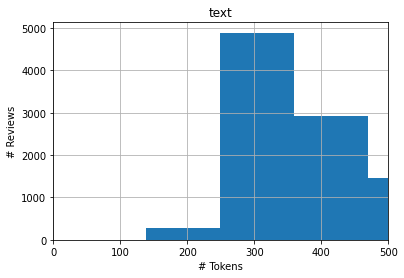

In [69]:

rev_df = pd.DataFrame({'text':rev_token_count})
rev_df.hist(bins = 30)
plt.xlim(0, 500)
plt.xlabel('# Tokens')
plt.ylabel('# Reviews')
plt.show()
# max length reviews = 300 tokens

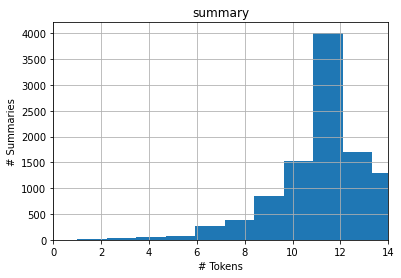

In [67]:
# max length reviews = 12 tokens
summary_df =  pd.DataFrame({'summary':summary_token_count})
summary_df.hist(bins = 30)
plt.xlim(0, 14)
plt.xlabel('# Tokens')
plt.ylabel('# Summaries')
plt.show()